# Embedding example

In [174]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creation of the data:

x: an array with _n_ elements where each element is assumed to be a nominal value (example: x[0]='hello,x[1]='world', etc).

y: an array constructed such that the elements show some mathematical structure. The array is constructed in the following way:

Every element of x can be written as $$x_i=a_i*10^0+b_i*10^1$$
Example: $$23:a=3,b=2$$
y is constructed as $$y_i=a_i \circ b_i, \textrm{with operator } \circ \in \{+,*,...\}$$
Example: $$x_i=23: y_i=5, \textrm{with } \circ = + $$

,x,a,b,y
0,1,1,0,0
1,2,2,0,0
2,3,3,0,0
3,4,4,0,0
4,5,5,0,0
5,6,6,0,0
6,7,7,0,0
7,8,8,0,0
8,9,9,0,0
9,10,0,1,0


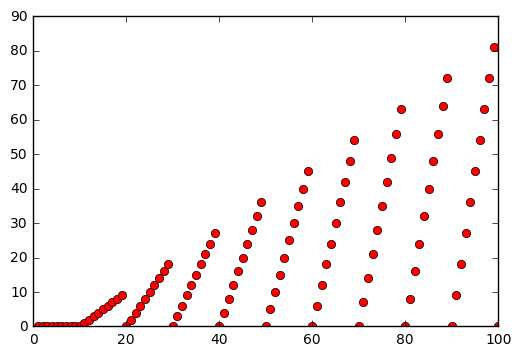

In [346]:
data=pd.DataFrame()
data['x'] = np.arange(1,101)
data['a']= data['x'] % 10           
data['b']= ((data['x']-data['a']) / 10).astype(int)                        
data['y']= data['a'] * data['b']  # experiment with changing the operator (+,*,...)

plt.plot(data['x'],data['y'],'ro')

data.head(15)

### Build an embedding model

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_52 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_48 (Embedding)         (None, 1, 2)          202         input_52[0][0]                   
____________________________________________________________________________________________________
reshaped_embedding (Reshape)     (None, 2)             0           embedding_48[0][0]               
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             3           reshaped_embedding[0][0]         
Total params: 205
_________________________________________________________________________

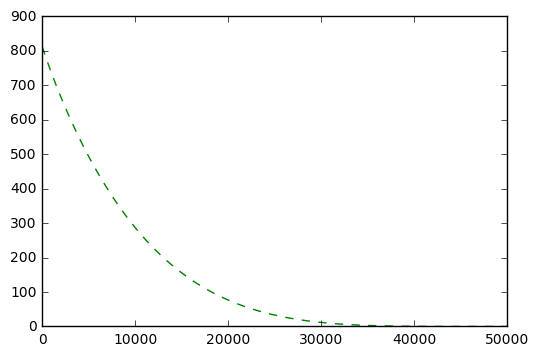

In [349]:
from keras.layers import Input, Embedding, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(1,))
x = Embedding(input_dim=101,output_dim=2)(input1)
x = Reshape((2,),name="reshaped_embedding")(x)
prediction = Dense(1,activation='linear',name='out',trainable=False)(x)

model_1 = Model(input=input1, output=prediction)
# fix the final weights:
model_1.get_layer("out").set_weights([np.array([[1],[1]]),np.array([0])])

model_1.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_1.summary()

model_1.fit(data['x'],data['y'],batch_size=100, nb_epoch=50000, verbose=0)

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--')
print ("loss:",model_1.history.history['loss'][-1],"mae:",model_1.history.history['mean_absolute_error'][-1])

In [194]:
# check the final weights are indeed fixed:
model_1.get_layer("out").get_weights()

[array([[ 1.],
        [ 1.]], dtype=float32), array([ 0.], dtype=float32)]

### Checking the fit:

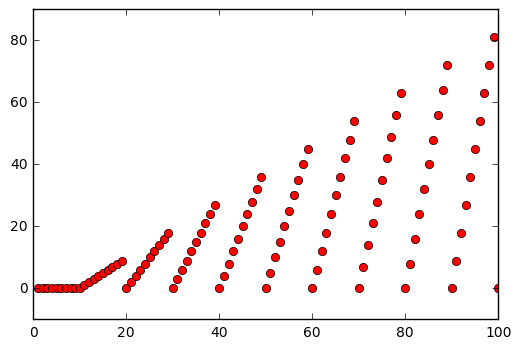

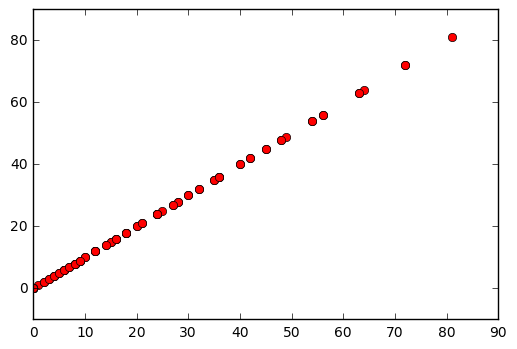

In [205]:
plt.figure(1)
plt.plot(data['x'],model_1.predict(data['x']),'ro')
plt.figure(2)
plt.plot(data['y'],model_1.predict(data['x']),'ro')

### Re-using the layers of the fit model to obtain the scores at the embedding layer

In [206]:
import pandas as pd
model_2 = Model(input=input1, output=model_1.get_layer("reshaped_embedding").output)

data=pd.concat( (data, pd.DataFrame(model_2.predict(data['x']),columns=['x1','x2'])),axis=1)
data.head(15)

,x,a,b,y,x1,x2
0,1,1,0,0,-0.042048,0.042048
1,2,2,0,0,-0.004609,0.004609
2,3,3,0,0,-0.003756,0.003756
3,4,4,0,0,0.022266,-0.022266
4,5,5,0,0,-0.026981,0.026981
5,6,6,0,0,0.013268,-0.013268
6,7,7,0,0,-0.004540,0.004540
7,8,8,0,0,0.020206,-0.020206
8,9,9,0,0,-0.000479,0.000479
9,10,0,1,0,0.008275,-0.008275


In [207]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, LabelSet

bk.output_notebook()

source = ColumnDataSource(data)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("x1", "x2",source=source)
#p.line("x1", "x2",source=source)   
    
labels = LabelSet(x="x1", y="x2", text="x",text_font_size="8pt", source=source)
p.add_layout(labels)

    
show(p)

Loading BokehJS ...

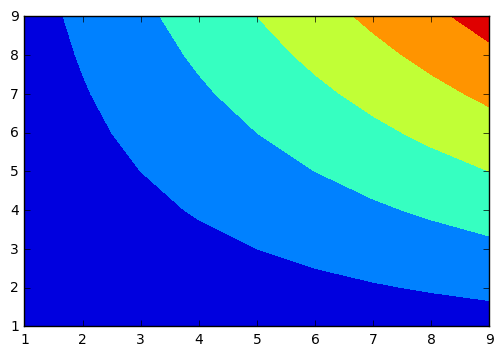

In [364]:
# embedding locates dummies are operator contours:

x = np.arange(1, 10)
y = np.arange(1, 10)
xx, yy = np.meshgrid(x, y, sparse=True)
#z = xx + yy 
z = xx * yy 

h = plt.contourf(x,y,z)

## Building the embedding layer manually by creating the one-hot encoding for X

In [239]:
#reset the dataframe
data=pd.DataFrame()
data['x'] = np.arange(1,101)
data['a']= data['x'] % 10           
data['b']= ((data['x']-data['a']) / 10).astype(int)                        
data['y']= data['a'] * data['b']  # experiment with changing the operator (+,*,...)


In [240]:
#create the one hot coding
one_hot=pd.get_dummies(data['x'])
one_hot.head(5)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_22 (InputLayer)            (None, 100)           0                                            
____________________________________________________________________________________________________
explicit_embedding (Dense)       (None, 2)             202         input_22[0][0]                   
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             3           explicit_embedding[0][0]         
Total params: 205
____________________________________________________________________________________________________
('loss:', 5.3143872635885714e-10, 'mae:', 2.6755778890219517e-06)


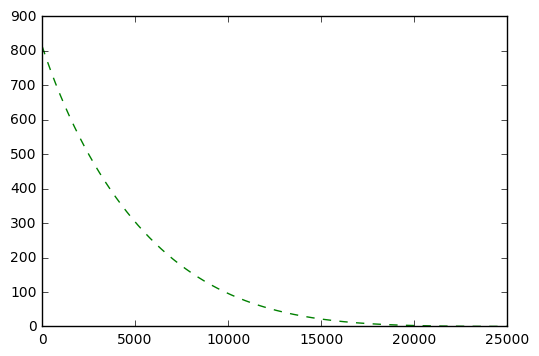

In [212]:
from keras.layers import Input,Dense
from keras.models import Model

input1 = Input(shape=(100,))
x = Dense(2, name="explicit_embedding")(input1)
prediction = Dense(1,activation='linear',name='out',trainable=False)(x)

model_3 = Model(input=input1, output=prediction)

# fix the final weights:
model_3.get_layer("out").set_weights([np.array([[ 1],[1]]),np.array([0])])

model_3.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_3.summary()

model_3.fit(one_hot.values,data['y'],batch_size=100, nb_epoch=25000, verbose=0)

plt.plot(model_3.history.epoch, model_3.history.history['loss'], 'g--')
print ("loss:",model_1.history.history['loss'][-1],"mae:",model_1.history.history['mean_absolute_error'][-1])

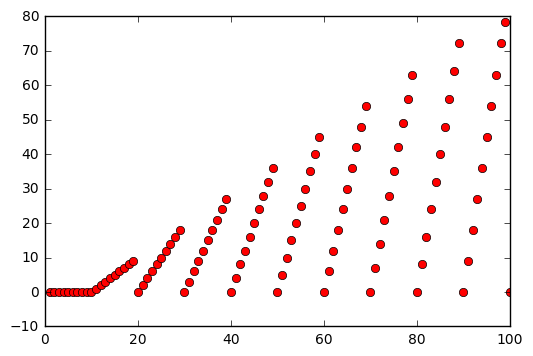

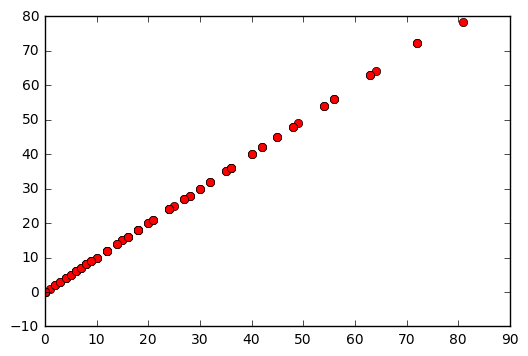

In [241]:
plt.figure(1)
plt.plot(data['x'],model_3.predict(one_hot.values),'ro')
plt.figure(2)
plt.plot(data['y'],model_3.predict(one_hot.values),'ro')

In [223]:
model_4 = Model(input=input1, output=model_3.get_layer("explicit_embedding").output)

data=pd.concat( (data, pd.DataFrame(model_4.predict(one_hot.values),columns=['x1','x2'])),axis=1)
data.head(15)

,x,a,b,y,x1,x2
0,1,1,0,0,0.126495,-0.126459
1,2,2,0,0,0.048801,-0.048748
2,3,3,0,0,0.103668,-0.103622
3,4,4,0,0,-0.045183,0.045238
4,5,5,0,0,-0.036215,0.036339
5,6,6,0,0,-0.038958,0.038979
6,7,7,0,0,-0.097256,0.097403
7,8,8,0,0,-0.057608,0.057655
8,9,9,0,0,0.029789,-0.029741
9,10,0,1,0,-0.080072,0.079870


In [224]:
bk.output_notebook()

source = ColumnDataSource(data)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("x1", "x2",source=source)
#p.line("x1", "x2",source=source)   
    
labels = LabelSet(x="x1", y="x2", text="index",text_font_size="8pt", source=source)
p.add_layout(labels)

    
show(p)

Loading BokehJS ...

# Requiring  more structure:

In the previous example, the 100 dummies were fully independent. Now we use values _a_ and _b_ which we will treat as interchangable dummies of length 10. 

In [386]:
#reset the dataframe
data=pd.DataFrame()
data['x'] = np.arange(1,101)
data['a']= data['x'] % 10           
data['b']= ((data['x']-data['a']) / 10).astype(int)                        
data['y']= data['a'] + data['b']  # experiment with changing the operator (+,*,...)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_56 (InputLayer)            (None, 2)             0                                            
____________________________________________________________________________________________________
embedding_52 (Embedding)         (None, 2, 1)          11          input_56[0][0]                   
____________________________________________________________________________________________________
reshaped_embedding (Reshape)     (None, 2)             0           embedding_52[0][0]               
____________________________________________________________________________________________________
out (Dense)                      (None, 1)             3           reshaped_embedding[0][0]         
Total params: 14
__________________________________________________________________________

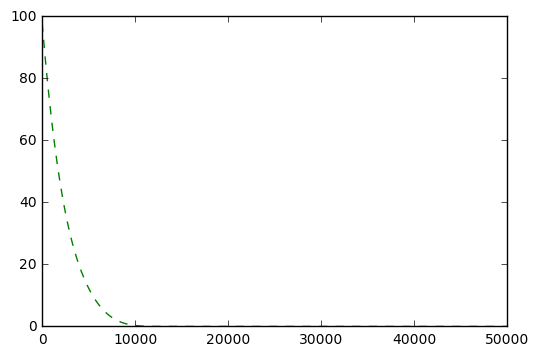

In [382]:
from keras.layers import Input, Embedding, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(2,))
x = Embedding(input_dim=11,input_length=2,output_dim=1)(input1)
x = Reshape((2,),name="reshaped_embedding")(x)
#x = Dense(1,activation='tanh')(x)
prediction = Dense(1,activation='linear',name='out',trainable=False)(x)

model_5 = Model(input=input1, output=prediction)
# fix the final weights:
model_5.get_layer("out").set_weights([np.array([[1],[1]]),np.array([0])])

model_5.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_5.summary()

model_5.fit(data[['a','b']].values,data['y'],batch_size=100, nb_epoch=50000, verbose=0)

plt.plot(model_5.history.epoch, model_5.history.history['loss'], 'g--')
print ("loss:",model_5.history.history['loss'][-1],"mae:",model_5.history.history['mean_absolute_error'][-1])

In [ ]:
# specification for the multiplication model

'''
input1 = Input(shape=(2,))
x = Embedding(input_dim=11,input_length=2,output_dim=1)(input1)
x = Reshape((2,),name="reshaped_embedding")(x)
x = Dense(1,activation='tanh')(x)
prediction = Dense(1,activation='linear',name='out',trainable=True)(x)

model_5 = Model(input=input1, output=prediction)
#fix the final weights:
# do not fix in this model: #model_5.get_layer("out").set_weights([np.array([[1],[1]]),np.array([0])])
'''

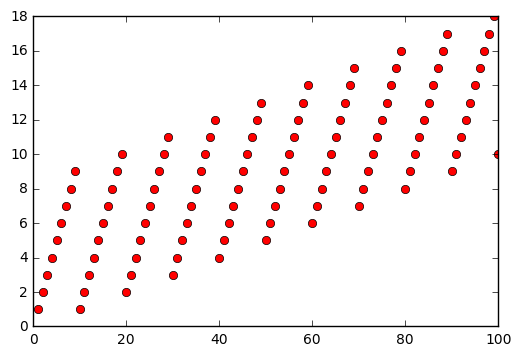

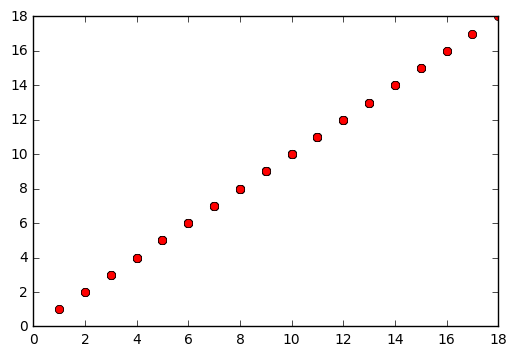

In [383]:
plt.figure(1)
plt.plot(data['x'],model_5.predict(data[['a','b']].values),'ro')
plt.figure(2)
plt.plot(data['y'],model_5.predict(data[['a','b']].values),'ro')

In [387]:
model_6 = Model(input=input1, output=model_5.get_layer("reshaped_embedding").output)

data=pd.concat( (data, pd.DataFrame(model_6.predict(data[['a','b']].values),columns=['x1','x2'])),axis=1)
data=pd.concat( (data, pd.DataFrame(model_5.predict(data[['a','b']].values),columns=['y_pred'])),axis=1)

data.head(25)

,x,a,b,y,x1,x2,y_pred
0,1,1,0,1,1.000000e+00,-8.300902e-09,1.0
1,2,2,0,2,2.000000e+00,-8.300902e-09,2.0
2,3,3,0,3,3.000000e+00,-8.300902e-09,3.0
3,4,4,0,4,4.000000e+00,-8.300902e-09,4.0
4,5,5,0,5,5.000000e+00,-8.300902e-09,5.0
5,6,6,0,6,6.000000e+00,-8.300902e-09,6.0
6,7,7,0,7,7.000000e+00,-8.300902e-09,7.0
7,8,8,0,8,8.000000e+00,-8.300902e-09,8.0
8,9,9,0,9,9.000000e+00,-8.300902e-09,9.0
9,10,0,1,1,-8.300902e-09,1.000000e+00,1.0


In [388]:
bk.output_notebook()

source = ColumnDataSource(data)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("x1", "x2",source=source)
#p.line("x1", "x2",source=source)   
    
labels = LabelSet(x="x1", y="x2", text="x",text_font_size="8pt", source=source)
p.add_layout(labels)

    
show(p)

Loading BokehJS ...